In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pgeocode
import folium
from folium.plugins import HeatMap
import numpy as np

In [3]:
df = pd.read_csv('./tmppruex1ar.csv')
df = df[['Facility Neighborhood', 'Facility Zip Code', 'Type of Marijuana License', 'Application Status']]
print(df.isna().sum())
print(df.isna().any(axis=1).sum())
print(len(df))

Facility Neighborhood         0
Facility Zip Code            58
Type of Marijuana License    24
Application Status            0
dtype: int64
68
158


In [4]:
df['Type of Marijuana License'] = df['Type of Marijuana License'].fillna('Unknown License')

In [5]:
df_neighbor = df['Facility Neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='counts')
df_neighbor

,Neighborhood,counts
0,Dorchester,27
1,Boston,25
2,Mattapan,17
3,Brighton,12
4,Roxbury,12
5,East Boston,7
6,Roslindale,6
7,WestRoxbury,5
8,BackBay,5
9,Allston,5


In [6]:
df_license = df['Type of Marijuana License'].value_counts().rename_axis('License').reset_index(name='counts')
df_license

,License,counts
0,Recreational retail cannabis dispensary,51
1,Adult use dispensary,31
2,Unknown License,24
3,Delivery (wholesale),8
4,Medical,6
5,Recreational retail cannabis dispensary;Delive...,5
6,Co-located recreational and medical cannabis d...,4
7,Delivery (courier);Delivery (wholesale),4
8,Medical/recreational co-located,3
9,Recreational retail cannabis dispensary;Produc...,3


In [7]:
df_status = df['Application Status'].value_counts().rename_axis('Status').reset_index(name='counts')
df_status

,Status,counts
0,Withdrawn,25
1,Approved,24
2,Inactive,23
3,Conditionally approved,14
4,Under review,13
5,Open for Operations,12
6,Approved BCB - Executed HCA - Pending CCC,11
7,Approved BCB - Executed HCA - Pending CCC - Eq...,8
8,Complete equity pending hearing,6
9,Rejected with prejudice,4


In [35]:
license = df['Type of Marijuana License'].str.extract(r'([\w|\(|\)|\/|\-|\s]+)[\;]?', expand=False)
license

0                Recreational retail cannabis dispensary
1                Recreational retail cannabis dispensary
2      Co-located recreational and medical cannabis d...
3                                        Unknown License
4                Recreational retail cannabis dispensary
                             ...                        
153                                 Adult use dispensary
154                                 Adult use dispensary
155                                 Adult use dispensary
156                                 Adult use dispensary
157                                 Adult use dispensary
Name: Type of Marijuana License, Length: 158, dtype: object

In [46]:
df_license_analysis = license.value_counts().rename_axis('license').reset_index(name='counts')
df_license_analysis

,license,counts
0,Recreational retail cannabis dispensary,62
1,Adult use dispensary,31
2,Unknown License,24
3,Delivery (wholesale),10
4,Delivery (courier),9
5,Medical,6
6,Co-located recreational and medical cannabis d...,5
7,Medical/recreational co-located,3
8,Cultivation,2
9,Agricultural/Farming,2


<AxesSubplot:title={'center':'# Licenses'}, xlabel='license'>

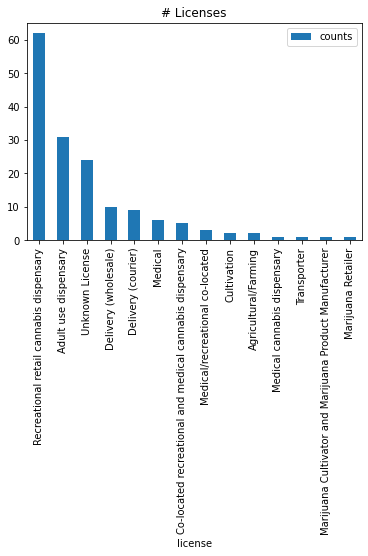

In [49]:
df_license_analysis.plot.bar(x='license', y='counts', title="# Licenses")

The most common used license is Recreational retail cannabis dispensary, and then Adult use dispensary. There are about 15% records didn't show the type of the license.

<AxesSubplot:title={'center':'# Facility in Neighborhood'}, xlabel='Neighborhood'>

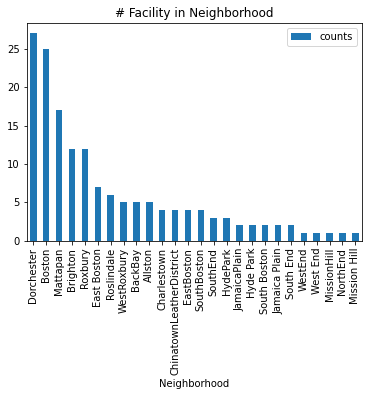

In [52]:
df_neighbor.plot.bar(x='Neighborhood', y='counts', title="# Facility in Neighborhood")

The number of facilities are not many. Dorchester and Boston have the most failities, then Mattapan, then Brighton and Roxbury.